# Data Cleaning Practice  

Goals:
- Practice data cleaning with Python
- Seek concise code
- Clearly document decisions
- Be thorough 

Dataset:
- Alzheimers disease and healthy aging data
- Dataset Information 
    - https://www.cdc.gov/aging/healthybrain/brfss-faq-cognitive.htm
    - https://www.cdc.gov/aging/publications/BRFSS-cognitive-decline-brief-508.pdf

"The BRFSS surveys community-dwelling adults and does not include residents of long-term care homes, group homes, or other facilities. In addition, if the selected respondent cannot respond to the survey because of physical or cognitive limitations, that respondent and their entire household are removed from the sample."

Contains information from (https://catalog.data.gov/dataset/alzheimers-disease-and-healthy-aging-data), which is made available
here under the Open Database License (ODbL) https://opendatacommons.org/licenses/odbl/1-0/.


Important Note: 
- Data is reasonably clean and further study analysis may require extensive understanding of the data through documentation.

In [1]:
### Packages
import numpy as np
import pandas as pd
# Switch to modin when data wrangler extension is no longer needed
# import modin.pandas as pd 
import os
from janitor import clean_names
os.chdir('C:/Users/WulfN/')

### Read in Data
alz_messy = clean_names(pd.read_csv('./datasets/unclean_data_practice/Alzheimer_s_Disease_and_Healthy_Aging_Data.csv'))
                     
# remove scientific notation
pd.options.display.float_format = '{:20,.2f}'.format

# multitple outputs per cell
%config InteractiveShell.ast_node_interactivity = "all"

alz_messy.head(5)

,rowid,yearstart,yearend,locationabbr,locationdesc,datasource,class,topic,question,data_value_unit,...,stratification2,geolocation,classid,topicid,questionid,locationid,stratificationcategoryid1,stratificationid1,stratificationcategoryid2,stratificationid2
0,BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE,2022,2022,PA,Pennsylvania,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Native Am/Alaskan Native,POINT (-77.86070029 40.79373015),C05,TMC01,Q03,42,AGE,5064,RACE,NAA
1,BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE,2022,2022,SD,South Dakota,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Asian/Pacific Islander,POINT (-100.3735306 44.35313005),C05,TMC01,Q03,46,AGE,65PLUS,RACE,ASN
2,BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE,2022,2022,ID,Idaho,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-114.36373 43.68263001),C05,TMC01,Q03,16,AGE,65PLUS,RACE,BLK
3,BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE,2022,2022,MD,Maryland,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-76.60926011 39.29058096),C05,TMC01,Q03,24,AGE,65PLUS,RACE,BLK
4,BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER,2022,2022,WI,Wisconsin,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Male,POINT (-89.81637074 44.39319117),C05,TMC01,Q03,55,AGE,65PLUS,GENDER,MALE


In [2]:
alz_messy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284142 entries, 0 to 284141
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   rowid                       284142 non-null  object 
 1   yearstart                   284142 non-null  int64  
 2   yearend                     284142 non-null  int64  
 3   locationabbr                284142 non-null  object 
 4   locationdesc                284142 non-null  object 
 5   datasource                  284142 non-null  object 
 6   class                       284142 non-null  object 
 7   topic                       284142 non-null  object 
 8   question                    284142 non-null  object 
 9   data_value_unit             284142 non-null  object 
 10  datavaluetypeid             284142 non-null  object 
 11  data_value_type             284142 non-null  object 
 12  data_value                  192808 non-null  float64
 13  data_value_alt

### Questions/Tasks after Viewing Data
This will be updated over the course of analysis
- Does a data dictionary exist for this data?
    - https://chronicdata.cdc.gov/Healthy-Aging/Alzheimer-s-Disease-and-Healthy-Aging-Data/hfr9-rurv
- View categorys of the stratified columns
    - Create bar graphs with counts
- State or region indicator for the locationdesc column
- Change data value unit '%' to 'percentage'
- What is the data value alt?
- distinct data footnotes, can many of these be removed?
- how are the low and high confidence variables derived? 
- clean geolocation column, seperate latitude and longitude. 
- class id, question id, location id - what are these? 
- range of year start and year end?
- What do to with NAs for the data values?
- May group by location to see num rows per location
    - geographic bias?
    - ** Should not be needed due to fully populated locationid (double check)
- class is more descriptive and lcear than classid, drop classid
- topicid / questionid may be valuable for shorthand on topics / questions
- What level are the rows at - they may not be at the participant level
- If participants are asked multiple questions, can individual participants be inferred
- is rowid participant level
    - group by rowid. there are 39 topics and 39 questions, if # distinct rowid * 39 = len(alz_messy), this would suggest each participant is given the same questionaire. 
- 59 distinct locationids, only 54 distinct geolocations (11% of values are missing data - appears location ids of 9000+ correspond with missing lat/longitudes)
- Data Source is singular and can be removed from the dataframe
- stratificationcategory1 is only Age group 
- stratification1 contains 'overall', '50-64 years', and '65 years or older', equally distributed.
    - What is overall?
    - stratification1id is less verbose duplicate - will drop 
- 42% of stratification2 is 'other', data may be biased by race or gender
- stratificationcategory2 has race/ethnicity and gender.
- stratificationcategory2id populates missing values with 'overall', othwerise the same as stratificationscategory2
    - Does 'overall' for other variables mean data is missing, or something else
- stratificationid2 is shorthand for stratification 2
- are the questions the same every year?

### Summary of tasks given observations and questions
This will be updated over the course of analysis. Considerations are secondary tasks that may not be completed
- ~~Develop function to view each category of categorical variables~~
- ~~Partition dataset by yearend - yearstart > 0~~
    - Investigate difference after data has been cleaned 
- Group by rowid, see dist'n of rowid counts
    - May help clarify if data is at the participant level, or reveal that some participants have answered fewer questions
    - first pass at rowid suggests data is at the different strati level and individual participants may not be extracted
- Understand rowid as it gives ids of th
- Create indicator for state/region
    - Consider summary statistics at the region or state level. 
    - Consider simple choropleth maths for state level stats.
- Remove unneeded columns: datasource, classid, data_value_unit, datavaluetypeid, one or both of (data_value_footnote / _symbol), stratificationcategory1, stratificationcategoryid1 (most likely)
    - other id columns are duplicates, though may be helpful with decoding rowid. these or there non-id counterparts may be dropped. 
- Split geolocation into lat and long
    - consider creating image of locations on map

### Thoughts on further analysis
- Better understand topics and questions.
    - Decide what insights may be valuable.
- Then plan graphs. These may be at the topic, question, state, region, race/ethnicity, gender, age group, or some combination of the above. 

In [3]:
# This needs to be changed from lists to NumPy - perhaps move to different script

class unique_categories: 

    def __init__(self, dataframe, category_list): 
        self.dataframe = dataframe
        self.category_list = category_list

    def category_dict(self): 
        """
        Create dictionary from dataframe with feature names and distinct 
        categories for that feature name.
        """
        category_df = self.dataframe[self.category_list]
        messy_category_dict = dict({c: category_df[c].unique() for c in category_df})
        
        get_categories = {}

        for key, values in messy_category_dict.items():
            get_categories[key] = values.tolist()

        return get_categories

    def get_num_categories(self): 
        """
        Number of categories per feature given.
        """
        category_dict = self.category_dict()

        num_categories = []

        for key in category_dict.keys():
            num_categories = num_categories + [len(category_dict[key])]

        return num_categories
    
    def category_lists(self): 
        """
        Lists with categories and NAs such that the length of all 
        lists are the same. 
        """
        num_categories = self.get_num_categories()
        category_dict = self.category_dict()

        add_na = []

        for item in num_categories:
            sum_na = [max(num_categories) - item]
            add_na = add_na + sum_na

        for i, key in enumerate(category_dict): 
            category_dict[key].extend(['NA'] * add_na[i]) 

        return category_dict

    def category_count_df(self):
        """
        Dataframe with feature names, number of categories for that feature, and a list of the categories for that feature. 
        """
        category_dict = self.category_dict()

        category_count_df = pd.DataFrame({
            'var_name': category_dict.keys(),
            'num_categories': self.get_num_categories(),
            'categories': list(category_dict.values())
        })

        return category_count_df

    def category_df(self):
        """
        Feature name as a column, categories as values for that feature.
        """
        category_lists = self.category_lists()

        category_df = pd.DataFrame(
            data = list(zip(*category_lists.values())), 
            columns = list(category_lists.keys())
        ) 

        return category_df

In [4]:
# --- Columns can likely be de-duplicated with ID columns
misc = ['datasource', 'class', 'classid', 'topic', 'topicid', 'question', 'questionid', 'data_value_footnote', 'locationid'] 
stratified = [col for col in alz_messy.columns if col.startswith('strati')]

# Consider selecting columns that end with ID, plus a few more. 
category_features = misc + stratified # something is wrong with this list here

In [5]:
# Is any of this valuable - why not create tables or graphs with counts...
category_info = unique_categories(alz_messy, category_features)
category_info.category_df() # takes eternity due to nested loops and lists

# Data Source is singular and can be removed from the dataframe
# stratificationcategory1 is only Age group 

In [ ]:
# Does year start always equal year end? 
# need to ensure that when grouping by year we are grouping by the same time periods
diff_test = alz_messy[['yearstart', 'yearend']]
diff_test['yeardiff'] = alz_messy['yearend'] - alz_messy['yearstart']

multi_year = diff_test[diff_test['yeardiff'] > 0]
multi_year # 9261 rows have multiple years. This will need to be thought of carefully. 

- Single year questions are considered 'fixed core', and those asked every other year are considered 'rotating core'

In [ ]:
# Filter to rows where yeardiff > 0. 
# If yearstart = year end, is this 12 months of data?
# If year start != year end, is this a range of months?

multi_year_df = alz_messy.iloc[multi_year.index]
multi_year_df.head(5)

# Are multi year rows due to the topic or question

# 9261 rows have multiple years. Why only 1316 distinct rows in th emulti_year_df? (distinct row_id)

# Year start is either 2019 OR 2021 for multi_year_df.
# Year end is only 2022.


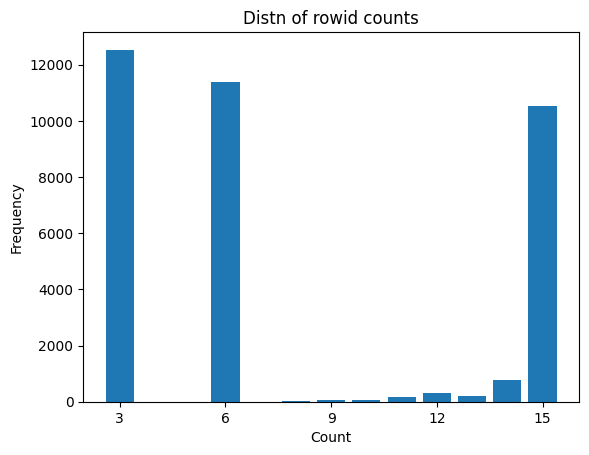

In [92]:
import matplotlib.pyplot as plt

rowid_counts = (alz_messy.groupby('rowid')
                .agg(count = ('rowid', 'count'))
                .groupby('count')
                .agg(qty = ('count', 'count'))
                .reset_index()
                )

plt.bar(rowid_counts['count'], rowid_counts['qty'], align='center')
plt.xticks(range(3,16,3)); 
plt.title('Distn of rowid counts'); 
plt.xlabel('Count'); 
plt.ylabel('Frequency'); 
plt.show();

- 3 noticable groupings with frequency > 10,000 (3,6,15)
    - Consider investigating the groupings further to better understand the study design

In [ ]:
# Feature level line graphs giving count of vategory over time

# Group by year and category by variable

# For each col, group by year and that column

# Can the result be a grid of each of the plots in the list of columns? (Like facetGrid)

# Will there be to many plots for this to be clear? (experiment)

# If num categories is too large, defult to a table

In [ ]:
### Template AI Code to refine:
import seaborn as sns

def plot_category_trends_seaborn(df, year_col, columns_to_plot): 
    sns.set(style="whitegrid", palette="muted") # select function other than set
    
    for col in columns_to_plot:
        # Group by year and the categorical column, then count occurrences
        category_counts = df.groupby([year_col, col]).size().reset_index(name='Count')

        # Plot using seaborn's lineplot
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=category_counts, x=year_col, y='Count', hue=col, marker="o")

        # Set titles and labels
        plt.title(f'Trend for {col}', fontsize=16)
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()